In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_statistics(results):
    
    stats = {}
    stats["initial_errors"] = np.linalg.norm(results["initial_images"] - results["real_image"], axis=(1, 2))
    stats["final_errors"] = np.linalg.norm(results["images"] - results["real_image"], axis=(1, 2))
    stats["log10_res"] = np.log10(results["residues"][:, -1])
    
    return stats

In [6]:
results_k2_p2 = np.load("results_k2_p2.npz")
results_k2_p4 = np.load("results_k2_p4.npz")

results_k4_p2 = np.load("results_k4_p2.npz")
results_k4_p4 = np.load("results_k4_p4.npz")

results_k2_nonneg_p2 = np.load("results_k2_nonneg_p2.npz")
results_k2_nonneg_p3 = np.load("results_k2_nonneg_p3.npz")

In [7]:
stats_k2_p2 = get_statistics(results_k2_p2)
stats_k2_p4 = get_statistics(results_k2_p4)

stats_k4_p2 = get_statistics(results_k4_p2)
stats_k4_p4 = get_statistics(results_k4_p4)

stats_k2_nn_p2 = get_statistics(results_k2_nonneg_p2)
stats_k2_nn_p3 = get_statistics(results_k2_nonneg_p3)

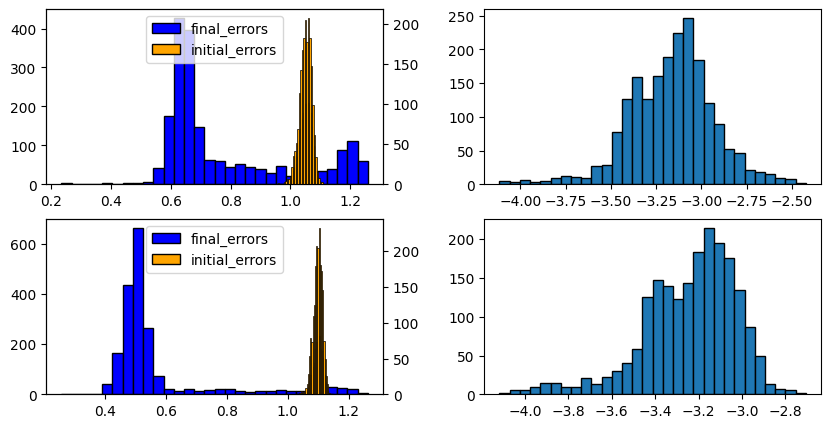

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.3)

#stats = [stats_k2_p2, stats_k2_p4]
stats = [stats_k2_nn_p2, stats_k2_nn_p3]

for i in range(2):

    ax2 = axes[i, 0].twinx()
    axes[i, 0].hist(stats[i]["final_errors"], bins=30, edgecolor="black", color="blue", label="final_errors");
    ax2.hist(stats[i]["initial_errors"], bins=30, edgecolor="black", linewidth=0.5, color="orange");
    axes[i, 0].hist(stats[i]["initial_errors"], bins=30, edgecolor="black", color="orange", label="initial_errors");
    axes[i, 0].legend(loc="upper center")

    axes[i, 1].hist(stats[i]["log10_res"], bins=30, edgecolor="black");

In [11]:
stats = [stats_k2_p2, stats_k2_p4, stats_k4_p2, stats_k4_p4, stats_k2_nn_p2, stats_k2_nn_p3]

for stat in stats:
    print(f"{np.min(stat['final_errors']):.2e}, {np.max(stat['final_errors']):.2e}")
    

2.49e-07, 4.66e-01
1.38e-04, 8.79e-01
3.99e-07, 5.10e-01
1.55e-03, 1.00e+00
2.34e-01, 1.26e+00
2.58e-01, 1.26e+00


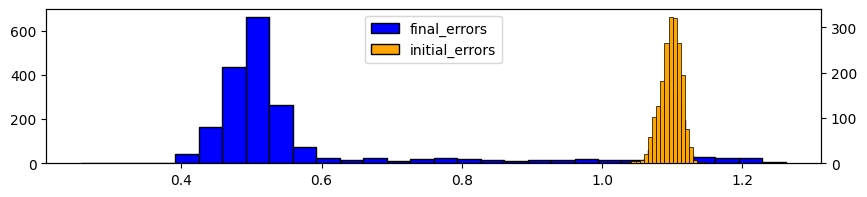

In [81]:
fig, ax = plt.subplots(1, figsize=(10, 2))

stats = [stats_k2_p2, stats_k2_p4, stats_k4_p2, stats_k4_p4, stats_k2_nn_p2, stats_k2_nn_p3]

i = 5

ax2 = ax.twinx()
ax.hist(stats[i]["final_errors"], bins=30, edgecolor="black", color="blue", label="final_errors");
ax2.hist(stats[i]["initial_errors"], bins=20, edgecolor="black", linewidth=0.5, color="orange");
ax.hist(stats[i]["initial_errors"], bins=20, edgecolor="black", color="orange", label="initial_errors");
ax.legend(loc="upper center")